# HW 1: Linear Algebra and Floating Point Arithmetic

## Direct Methods for the solution of Linear Systems

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

np.random.seed(0)  # Fixed random seed for reproducibility

In [2]:
def rel_error(x_true, x_sol):
    return np.linalg.norm(x_true - x_sol, 2) / np.linalg.norm(x_true, 2)

In [3]:
# Solves linear system and returns condition number and relative error
def solution_error(A, x_true):
    # Test problem solution
    y = A @ x_true

    # Condition number in 2-norm
    cond_2 = np.linalg.cond(A, p=2)
    # Conditioning number in inf-norm
    cond_inf = np.linalg.cond(A, p=np.inf)

    x_sol = np.linalg.solve(A, y)

    # relative error
    error = rel_error(x_true, x_sol)

    return cond_2, cond_inf, error

### Random matrix

In [4]:
r_dimensions = np.arange(10, 110, 10)
r_results = {}  # Stores results for varying dimensions

for n in r_dimensions:
    # Test problem
    A = np.random.rand(n, n)  # samples from a uniform distribution over [0, 1)
    x_true = np.ones((n,))

    cond_2, cond_inf, error = solution_error(A, x_true)
    # Storing results
    r_results[n] = {"cond_2": cond_2, "cond_inf": cond_inf, "rel_error": error}

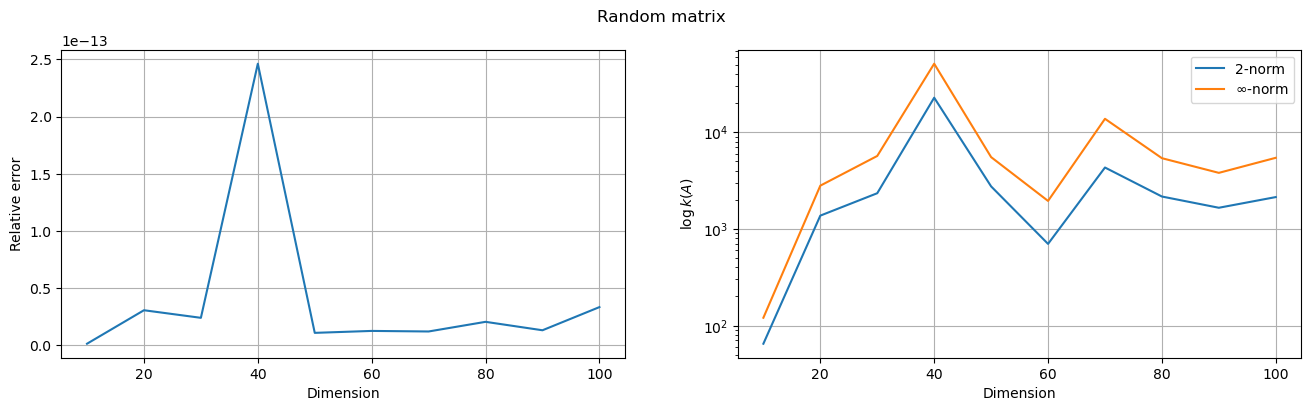

In [5]:
plt.figure(figsize=(16, 4))
plt.suptitle("Random matrix")

# Plotting relative error
plt.subplot(1, 2, 1)
plt.plot(r_dimensions, [r_results[dim]["rel_error"] for dim in r_dimensions])
plt.grid()
plt.xlabel("Dimension")
plt.ylabel("Relative error")

# Plotting condition number
plt.subplot(1, 2, 2)
plt.semilogy(r_dimensions, [r_results[dim]["cond_2"] for dim in r_dimensions])
plt.semilogy(r_dimensions, [r_results[dim]["cond_inf"] for dim in r_dimensions])
plt.xlabel("Dimension")
plt.ylabel(r"$\log k(A)$")
plt.legend(["2-norm", r"$\infty$-norm"])
plt.grid()

plt.show()

The random matrix is well-conditioned, as proven by the non-straight condition number lines in semiology scale. The well-conditioning of A and the stableness of the solving algorithm kept the relative error small, in the order of $10^{-13}$.  
Due to the equivalence of norms, the magnitude of the condition number does not depend significantly on the chosen norm, which is why the two plotted lines show identical trends.

### Vandermonde matrix

In [6]:
v_dimensions = np.arange(5, 35, 5)
v_results = {}  # Stores results for varying dimensions

for n in v_dimensions:
    # Test problem
    A = np.vander(np.arange(1, n + 1))
    x_true = np.ones((n,))

    cond_2, cond_inf, error = solution_error(A, x_true)

    # Storing results
    v_results[n] = {"cond_2": cond_2, "cond_inf": cond_inf, "rel_error": error}

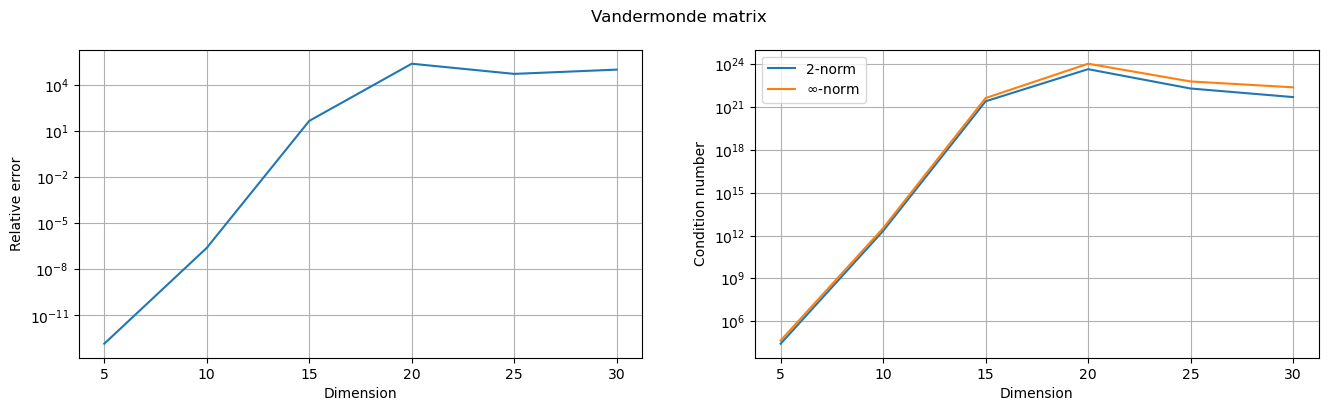

In [7]:
plt.figure(figsize=(16, 4))
plt.suptitle("Vandermonde matrix")

# Plotting relative error
plt.subplot(1, 2, 1)
plt.plot(v_dimensions, [v_results[dim]["rel_error"] for dim in v_dimensions])
plt.yscale("log")
plt.grid()
plt.xlabel("Dimension")
plt.ylabel("Relative error")

# Plotting condition number
plt.subplot(1, 2, 2)
plt.semilogy(v_dimensions, [v_results[dim]["cond_2"] for dim in v_dimensions])
plt.semilogy(v_dimensions, [v_results[dim]["cond_inf"] for dim in v_dimensions])
plt.grid()
plt.xlabel("Dimension")
plt.ylabel("Condition number")
plt.legend(["2-norm", r"$\infty$-norm"])

plt.show()

THe Vandermonde matrix is ill-conditioned, causing the relative error to increases dramatically, peaking at dimension 20.

### Hilbert matrix

In [8]:
h_dimensions = np.arange(4, 13)
h_results = {}  # Stores results for varying dimensions

for n in h_dimensions:
    # Test problem
    A = scipy.linalg.hilbert(n)
    x_true = np.ones((n,))

    cond_2, cond_inf, error = solution_error(A, x_true)

    # Storing results
    h_results[n] = {"cond_2": cond_2, "cond_inf": cond_inf, "rel_error": error}

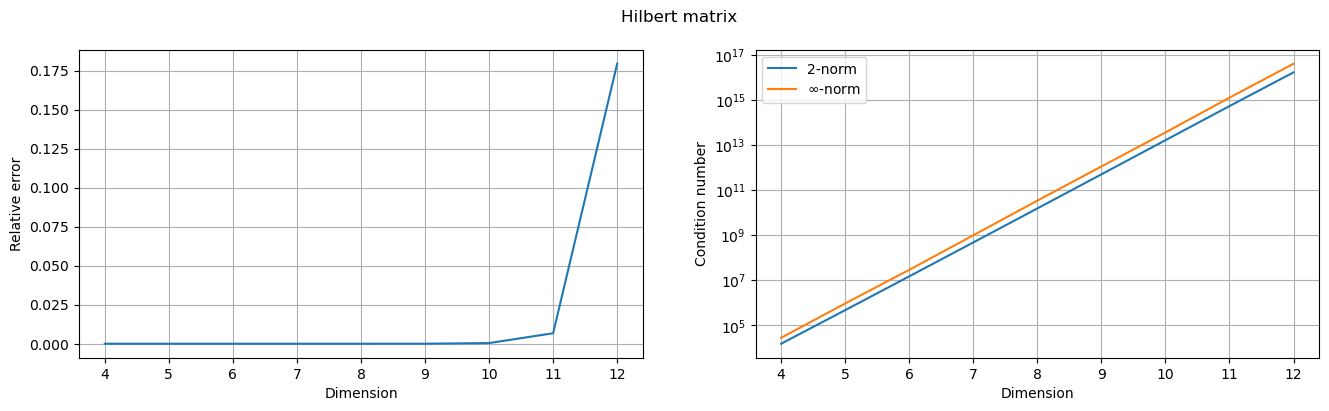

In [9]:
plt.figure(figsize=(16, 4))
plt.suptitle("Hilbert matrix")

# Plotting relative error
plt.subplot(1, 2, 1)
plt.plot(h_dimensions, [h_results[dim]["rel_error"] for dim in h_dimensions])
plt.grid()
plt.xlabel("Dimension")
plt.ylabel("Relative error")

# Plotting condition number
plt.subplot(1, 2, 2)
plt.semilogy(h_dimensions, [h_results[dim]["cond_2"] for dim in h_dimensions])
plt.semilogy(h_dimensions, [h_results[dim]["cond_inf"] for dim in h_dimensions])
plt.grid()
plt.xlabel("Dimension")
plt.ylabel("Condition number")
plt.legend(["2-norm", r"$\infty$-norm"])

plt.show()

The Hilbert matrix is also ill-conditioned, as proven by the straight line in the condition number plot on semilogy scale. As a result, the error sharply increasing at $n=12$.

# Floating point arithmetic

## Computing machine precision

In [10]:
eps = 1  # Machine precision
found = False  # Found machine precision

while not found:
    if 1.0 + (eps / 2) > 1.0:
        eps /= 2
    else:
        found = True

print(f"The machine precision is: {eps}")

The machine precision is: 2.220446049250313e-16


## Approximating Nepero number

In [11]:
import math

In [12]:
nep_dims = np.logspace(1, 17, num=1000)  # From 10^1 to 10^17
nep_results = []  # Stores a_n

for n in nep_dims:
    a_n = (1 + 1 / n) ** n
    nep_results.append(a_n)

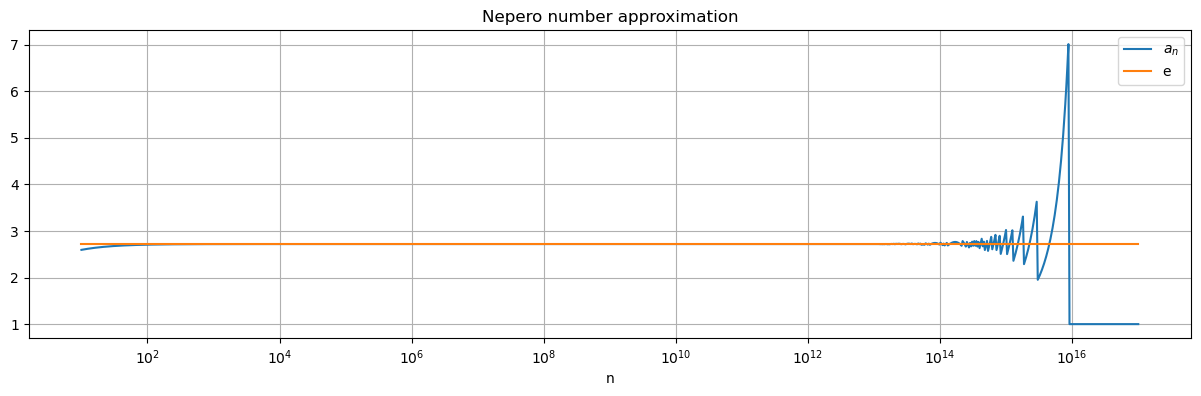

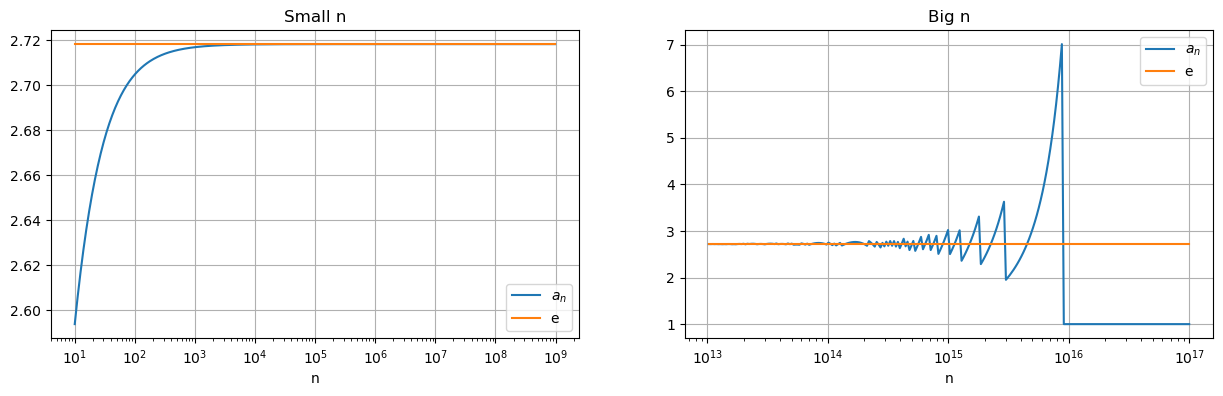

In [13]:
# Full plot
plt.figure(figsize=(15, 4))
plt.plot(nep_dims, nep_results, label=r"$a_n$")
plt.plot(nep_dims, np.full(len(nep_dims), math.e), label="e")
plt.xlabel("n")
plt.xscale("log")
plt.grid()
plt.legend()
plt.title("Nepero number approximation")

# Small n values
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(nep_dims[:500], nep_results[:500], label=r"$a_n$")
plt.plot(nep_dims[:500], np.full(500, math.e), label="e")
plt.xlabel("n")
plt.xscale("log")
plt.grid()
plt.title("Small n")
plt.legend()

# Big n values
plt.subplot(1, 2, 2)
plt.plot(nep_dims[750:], nep_results[750:], label=r"$a_n$")
plt.plot(nep_dims[750:], np.full(250, math.e), label="e")
plt.xlabel("n")
plt.xscale("log")
plt.grid()
plt.title("Big n")
plt.legend()

plt.show()

For:
- $n < 10^9$: $a_n$ is correctly represented and is converging to e.
- $10^9 < n < 10^{16}$: $\frac{1}{n}$ is close to $\epsilon$ and the rounding errors generate oscillations.
- $n > 10^{16}$: The factor $\frac{1}{n} < \epsilon$ so $1 + \frac{1}{n} = 1$ in floating point representation making $a_n$ equal to 1.

## Eigenvalues and full-rank condition

In [14]:
A = np.array([[4, 2], [1, 3]])
B = np.array([[4, 2], [2, 1]])

print(
    f"A's rank is {np.linalg.matrix_rank(A)} and its eigenvalues {np.linalg.eigvals(A)}"
)
print(
    f"B's rank is {np.linalg.matrix_rank(B)} and its eigenvalues {np.linalg.eigvals(B)}"
)

A's rank is 2 and its eigenvalues [5. 2.]
B's rank is 1 and its eigenvalues [5. 0.]


The np.lingalg.matrix_rank() uses Singular Value Decomposition to compute the rank of the matrix. The rank is determined by the number of singular values, in $\Sigma$, that are above a tolerance threshold; singular values below the threshold are considered to be 0.  
The B matrix has one singular value greater then the tolerance threshold and one equal to 0, so the computed rank is 1. This result is correct because the two rows of B are linearly dependant. However, if the singular values are very small but not 0 and fall below the tolerance threshold (as shown in the following example), the rank will be underestimated.

In [18]:
diag = [1, 2e-16]  # The smallest singular value is 2e-16
C = np.diag(diag)
print(C)
print(f"C's computed rank is {np.linalg.matrix_rank(C)}, while the real rank is 2.")

[[1.e+00 0.e+00]
 [0.e+00 2.e-16]]
C's computed rank is 1, while the real rank is 2.
